<a href="https://colab.research.google.com/github/skywalker0803r/autorch/blob/main/examples/wadda_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/skywalker0803r/autorch.git

fatal: destination path 'autorch' already exists and is not an empty directory.


In [2]:
from autorch.autorch import transferlearning
import torch
from torch import nn
from torch.autograd import Function
from torch import optim
from torch.utils.data import TensorDataset,DataLoader
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import xgboost
from sklearn.multioutput import MultiOutputRegressor
from sklearn.utils import shuffle
import warnings 
warnings.simplefilter('ignore')

In [3]:
def normalize(x):
  return x/x.sum(axis=1).values.reshape(-1,1)

# Load Data

In [4]:
src_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/train_4565.csv',index_col=0))
tgt_data = shuffle(pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/phase1/test_250.csv',index_col=0))

# get columns_name
x_col = ['T10','T50','T90','N+A']
N_col = ['C5N','C6N','C6A','C7N','C7A','C8N','C8A','C9N','C9A','C10N','C10A']
P_col = ['C5NP','C5IP','C6NP','C6IP','C7NP','C7IP','C8NP','C8IP','C9NP','C9IP','C10NP','C10IP']
y_col = src_data.drop(x_col,axis=1).columns.tolist()

# split some data for final testing
tgt_data,final_test_data = tgt_data.iloc[:200],tgt_data.iloc[200:]

# instance WADDA model

In [5]:
src_x,src_y = src_data[x_col],src_data[y_col]
tgt_x,tgt_y = tgt_data[x_col],tgt_data[y_col]
model = transferlearning.WADDA(src_x,src_y,tgt_x,tgt_y)

# Fit Xgboost

In [6]:
xgb_200 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(tgt_x,tgt_y)
xgb_4765 = MultiOutputRegressor(xgboost.XGBRegressor(objective='reg:squarederror')).fit(src_x.append(tgt_x),src_y.append(tgt_y))

# Fit WADDA

  1%|          | 26/3000 [00:00<00:11, 259.80it/s]

start train
ep:0 loss:3.854973077774048


  5%|▍         | 143/3000 [00:00<00:08, 331.13it/s]

ep:100 loss:3.109407901763916


  9%|▊         | 257/3000 [00:00<00:07, 357.99it/s]

ep:200 loss:1.1978191137313843


 12%|█▏        | 374/3000 [00:01<00:06, 375.45it/s]

ep:300 loss:0.9209709763526917


 15%|█▌        | 455/3000 [00:01<00:06, 387.56it/s]

ep:400 loss:0.8286552429199219


 19%|█▉        | 577/3000 [00:01<00:06, 397.27it/s]

ep:500 loss:0.5460619926452637


 22%|██▏       | 657/3000 [00:01<00:06, 380.65it/s]

ep:600 loss:0.4316672384738922


 24%|██▍       | 734/3000 [00:01<00:06, 367.82it/s]

ep:700 loss:0.39313462376594543


 28%|██▊       | 845/3000 [00:02<00:05, 359.39it/s]

ep:800 loss:0.33546459674835205


 32%|███▏      | 962/3000 [00:02<00:05, 377.48it/s]

ep:900 loss:0.3825279176235199


 35%|███▍      | 1039/3000 [00:02<00:05, 379.22it/s]

ep:1000 loss:0.40486210584640503


 39%|███▊      | 1159/3000 [00:03<00:04, 380.62it/s]

ep:1100 loss:0.3185966908931732


 42%|████▏     | 1274/3000 [00:03<00:04, 376.73it/s]

ep:1200 loss:0.3455440402030945


 45%|████▌     | 1352/3000 [00:03<00:04, 379.86it/s]

ep:1300 loss:0.2740725576877594


 49%|████▉     | 1468/3000 [00:03<00:04, 372.91it/s]

ep:1400 loss:0.2494276762008667


 52%|█████▏    | 1546/3000 [00:04<00:03, 372.06it/s]

ep:1500 loss:0.3152540326118469


 55%|█████▌    | 1660/3000 [00:04<00:03, 370.55it/s]

ep:1600 loss:0.3418957591056824


 59%|█████▉    | 1776/3000 [00:04<00:03, 378.53it/s]

ep:1700 loss:0.2425651103258133


 62%|██████▏   | 1853/3000 [00:04<00:03, 377.73it/s]

ep:1800 loss:0.24411216378211975


 66%|██████▌   | 1965/3000 [00:05<00:03, 302.89it/s]

ep:1900 loss:0.27533984184265137


 69%|██████▉   | 2073/3000 [00:05<00:02, 338.12it/s]

ep:2000 loss:0.3884678781032562


 72%|███████▏  | 2150/3000 [00:05<00:02, 358.12it/s]

ep:2100 loss:0.265296071767807


 75%|███████▌  | 2259/3000 [00:06<00:02, 355.89it/s]

ep:2200 loss:0.1933528631925583


 79%|███████▉  | 2372/3000 [00:06<00:01, 366.87it/s]

ep:2300 loss:0.24695809185504913


 82%|████████▏ | 2445/3000 [00:06<00:01, 353.12it/s]

ep:2400 loss:0.26081299781799316


 85%|████████▌ | 2560/3000 [00:07<00:01, 370.92it/s]

ep:2500 loss:0.22687068581581116


 88%|████████▊ | 2637/3000 [00:07<00:00, 371.51it/s]

ep:2600 loss:0.19790317118167877


 92%|█████████▏| 2753/3000 [00:07<00:00, 366.48it/s]

ep:2700 loss:0.2115325778722763


 96%|█████████▌| 2866/3000 [00:07<00:00, 368.08it/s]

ep:2800 loss:0.24261465668678284


 98%|█████████▊| 2940/3000 [00:08<00:00, 358.26it/s]

ep:2900 loss:0.26101237535476685


100%|██████████| 3000/3000 [00:08<00:00, 364.84it/s]


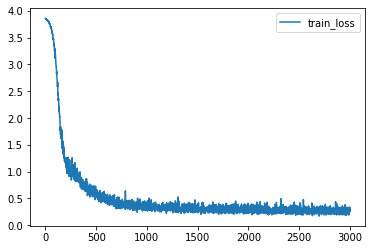

  0%|          | 26/10000 [00:00<01:18, 127.78it/s]

ep:0 d_loss:0.00551837682723999 t_loss:0.006521313916891813 r_loss:2.6064705848693848


  1%|          | 117/10000 [00:00<01:19, 124.53it/s]

ep:100 d_loss:-0.20872557163238525 t_loss:-0.5870136618614197 r_loss:1.2918493747711182


  2%|▏         | 224/10000 [00:01<01:17, 126.35it/s]

ep:200 d_loss:0.021027743816375732 t_loss:-0.5017209053039551 r_loss:1.0620540380477905


  3%|▎         | 316/10000 [00:02<01:16, 126.94it/s]

ep:300 d_loss:-0.08973821997642517 t_loss:0.1268298178911209 r_loss:0.9106989502906799


  4%|▍         | 424/10000 [00:03<01:13, 130.71it/s]

ep:400 d_loss:-0.07982464134693146 t_loss:0.16733328998088837 r_loss:0.8627651333808899


  5%|▌         | 520/10000 [00:04<01:27, 108.31it/s]

ep:500 d_loss:-0.025587007403373718 t_loss:-0.1636420637369156 r_loss:0.8291993141174316


  6%|▋         | 625/10000 [00:05<01:15, 123.48it/s]

ep:600 d_loss:-0.04324109107255936 t_loss:-0.03808046877384186 r_loss:0.7967416644096375


  7%|▋         | 719/10000 [00:05<01:14, 124.18it/s]

ep:700 d_loss:-0.08499053865671158 t_loss:0.14398632943630219 r_loss:0.6206976175308228


  8%|▊         | 821/10000 [00:06<01:17, 119.15it/s]

ep:800 d_loss:-0.01710851490497589 t_loss:-0.12336074560880661 r_loss:0.7118110060691833


  9%|▉         | 925/10000 [00:07<01:13, 124.22it/s]

ep:900 d_loss:-0.0431363508105278 t_loss:-0.04758302494883537 r_loss:0.5568723082542419


 10%|█         | 1017/10000 [00:08<01:11, 126.28it/s]

ep:1000 d_loss:-0.07075581699609756 t_loss:0.12073012441396713 r_loss:0.6823152899742126


 11%|█         | 1121/10000 [00:09<01:12, 121.74it/s]

ep:1100 d_loss:-0.01536571979522705 t_loss:-0.16059507429599762 r_loss:0.6090717911720276


 12%|█▏        | 1215/10000 [00:09<01:10, 124.23it/s]

ep:1200 d_loss:-0.06346213817596436 t_loss:0.06178554520010948 r_loss:0.6625359654426575


 13%|█▎        | 1320/10000 [00:10<01:09, 125.39it/s]

ep:1300 d_loss:-0.04675641655921936 t_loss:-0.012790036387741566 r_loss:0.5580212473869324


 14%|█▍        | 1414/10000 [00:11<01:06, 128.45it/s]

ep:1400 d_loss:-0.044947549700737 t_loss:-0.02157457359135151 r_loss:0.5955352187156677


 15%|█▌        | 1519/10000 [00:12<01:08, 124.39it/s]

ep:1500 d_loss:-0.05605974793434143 t_loss:-0.005616607144474983 r_loss:0.49910876154899597


 16%|█▋        | 1626/10000 [00:13<01:06, 125.83it/s]

ep:1600 d_loss:-0.047320861369371414 t_loss:-0.026057280600070953 r_loss:0.5066156983375549


 17%|█▋        | 1718/10000 [00:13<01:08, 121.78it/s]

ep:1700 d_loss:-0.06304138153791428 t_loss:0.01602020114660263 r_loss:0.5136328935623169


 18%|█▊        | 1824/10000 [00:14<01:06, 123.85it/s]

ep:1800 d_loss:-0.0479457750916481 t_loss:-0.016602110117673874 r_loss:0.5434449911117554


 19%|█▉        | 1916/10000 [00:15<01:03, 127.80it/s]

ep:1900 d_loss:-0.047210175544023514 t_loss:-0.019741347059607506 r_loss:0.5135310888290405


 20%|██        | 2020/10000 [00:16<01:08, 117.09it/s]

ep:2000 d_loss:-0.052696071565151215 t_loss:0.0063003781251609325 r_loss:0.5047471523284912


 21%|██▏       | 2127/10000 [00:17<01:02, 126.51it/s]

ep:2100 d_loss:-0.05309246852993965 t_loss:-0.020359791815280914 r_loss:0.5366547703742981


 22%|██▏       | 2221/10000 [00:17<01:01, 126.02it/s]

ep:2200 d_loss:-0.057131703943014145 t_loss:0.013683493249118328 r_loss:0.49040487408638


 23%|██▎       | 2315/10000 [00:18<01:00, 127.11it/s]

ep:2300 d_loss:-0.046218156814575195 t_loss:-0.033183611929416656 r_loss:0.4595639705657959


 24%|██▍       | 2420/10000 [00:19<01:00, 124.38it/s]

ep:2400 d_loss:-0.052148401737213135 t_loss:-0.002124309539794922 r_loss:0.46513792872428894


 25%|██▌       | 2527/10000 [00:20<00:58, 126.90it/s]

ep:2500 d_loss:-0.051049381494522095 t_loss:-0.00869143195450306 r_loss:0.4989449977874756


 26%|██▌       | 2619/10000 [00:21<01:00, 121.88it/s]

ep:2600 d_loss:-0.05095209926366806 t_loss:-0.010686852037906647 r_loss:0.500887930393219


 27%|██▋       | 2725/10000 [00:21<00:59, 122.67it/s]

ep:2700 d_loss:-0.04752519726753235 t_loss:-0.015215637162327766 r_loss:0.4460097551345825


 28%|██▊       | 2824/10000 [00:22<00:59, 120.36it/s]

ep:2800 d_loss:-0.04952770471572876 t_loss:-0.003017392475157976 r_loss:0.4092998206615448


 29%|██▉       | 2917/10000 [00:23<00:55, 127.60it/s]

ep:2900 d_loss:-0.04790501669049263 t_loss:-0.01852036453783512 r_loss:0.44252949953079224


 30%|███       | 3022/10000 [00:24<00:56, 123.55it/s]

ep:3000 d_loss:-0.05329255387187004 t_loss:0.006108038127422333 r_loss:0.44878950715065


 31%|███       | 3115/10000 [00:25<00:55, 124.49it/s]

ep:3100 d_loss:-0.049339257180690765 t_loss:0.005665805656462908 r_loss:0.416766881942749


 32%|███▏      | 3221/10000 [00:25<00:55, 122.67it/s]

ep:3200 d_loss:-0.0455290824174881 t_loss:-0.03776189684867859 r_loss:0.42477455735206604


 33%|███▎      | 3315/10000 [00:26<00:51, 128.83it/s]

ep:3300 d_loss:-0.054732970893383026 t_loss:0.009871342219412327 r_loss:0.41413912177085876


 34%|███▍      | 3420/10000 [00:27<00:52, 125.72it/s]

ep:3400 d_loss:-0.04296594858169556 t_loss:-0.04669289290904999 r_loss:0.47414854168891907


 35%|███▌      | 3526/10000 [00:28<00:52, 122.98it/s]

ep:3500 d_loss:-0.04965341091156006 t_loss:-0.010466068983078003 r_loss:0.4008992612361908


 36%|███▌      | 3614/10000 [00:29<00:54, 117.73it/s]

ep:3600 d_loss:-0.05577412247657776 t_loss:0.014112398028373718 r_loss:0.4590609669685364


 37%|███▋      | 3712/10000 [00:30<01:35, 66.10it/s]

ep:3700 d_loss:-0.058441221714019775 t_loss:-0.032295215874910355 r_loss:0.3929966688156128


 38%|███▊      | 3823/10000 [00:31<00:56, 109.61it/s]

ep:3800 d_loss:-0.05140770971775055 t_loss:-0.001154768280684948 r_loss:0.4365043342113495


 39%|███▉      | 3916/10000 [00:32<00:51, 118.07it/s]

ep:3900 d_loss:-0.05502782762050629 t_loss:-0.012658478692173958 r_loss:0.4261559247970581


 40%|████      | 4017/10000 [00:33<00:50, 118.98it/s]

ep:4000 d_loss:-0.05417022481560707 t_loss:0.0015241196379065514 r_loss:0.42343375086784363


 41%|████      | 4123/10000 [00:34<00:47, 124.03it/s]

ep:4100 d_loss:-0.044546544551849365 t_loss:-0.030775098130106926 r_loss:0.4213128387928009


 42%|████▏     | 4214/10000 [00:35<00:47, 122.55it/s]

ep:4200 d_loss:-0.05117308348417282 t_loss:-0.00044341670582070947 r_loss:0.4903453290462494


 43%|████▎     | 4321/10000 [00:35<00:44, 127.58it/s]

ep:4300 d_loss:-0.05171150341629982 t_loss:0.0024954453110694885 r_loss:0.40106257796287537


 44%|████▍     | 4414/10000 [00:36<00:43, 127.39it/s]

ep:4400 d_loss:-0.050186485052108765 t_loss:-0.015942377969622612 r_loss:0.43245938420295715


 45%|████▌     | 4521/10000 [00:37<00:43, 125.40it/s]

ep:4500 d_loss:-0.047855645418167114 t_loss:-0.02371845208108425 r_loss:0.3906538486480713


 46%|████▋     | 4627/10000 [00:38<00:42, 126.98it/s]

ep:4600 d_loss:-0.050376247614622116 t_loss:-0.008906508795917034 r_loss:0.39286908507347107


 47%|████▋     | 4718/10000 [00:39<00:42, 125.17it/s]

ep:4700 d_loss:-0.04766346141695976 t_loss:-0.02940460294485092 r_loss:0.41287651658058167


 48%|████▊     | 4826/10000 [00:40<00:40, 127.72it/s]

ep:4800 d_loss:-0.0496872216463089 t_loss:-0.00809914618730545 r_loss:0.3581429421901703


 49%|████▉     | 4916/10000 [00:40<00:45, 112.97it/s]

ep:4900 d_loss:-0.0504005067050457 t_loss:-0.00953225139528513 r_loss:0.4471753239631653


 50%|█████     | 5018/10000 [00:41<00:43, 115.61it/s]

ep:5000 d_loss:-0.04973074793815613 t_loss:-0.006990907248109579 r_loss:0.40009528398513794


 51%|█████     | 5122/10000 [00:42<00:39, 122.75it/s]

ep:5100 d_loss:-0.05123650282621384 t_loss:-0.021202128380537033 r_loss:0.4035281240940094


 52%|█████▏    | 5214/10000 [00:43<00:39, 121.29it/s]

ep:5200 d_loss:-0.0589936226606369 t_loss:0.010819481685757637 r_loss:0.369769811630249


 53%|█████▎    | 5318/10000 [00:44<00:37, 125.20it/s]

ep:5300 d_loss:-0.05448984354734421 t_loss:-0.009323528967797756 r_loss:0.41260507702827454


 54%|█████▍    | 5424/10000 [00:45<00:35, 127.98it/s]

ep:5400 d_loss:-0.050785474479198456 t_loss:-0.008922907523810863 r_loss:0.3917941153049469


 55%|█████▌    | 5517/10000 [00:45<00:35, 127.17it/s]

ep:5500 d_loss:-0.047312699258327484 t_loss:-0.01412808708846569 r_loss:0.40824517607688904


 56%|█████▌    | 5620/10000 [00:46<00:36, 120.56it/s]

ep:5600 d_loss:-0.04903530329465866 t_loss:-0.018929073587059975 r_loss:0.4257863163948059


 57%|█████▋    | 5714/10000 [00:47<00:34, 122.46it/s]

ep:5700 d_loss:-0.04911625385284424 t_loss:-0.016147207468748093 r_loss:0.42150646448135376


 58%|█████▊    | 5817/10000 [00:48<00:33, 123.24it/s]

ep:5800 d_loss:-0.05152492597699165 t_loss:-0.0025971808936446905 r_loss:0.4035831093788147


 59%|█████▉    | 5922/10000 [00:49<00:32, 126.43it/s]

ep:5900 d_loss:-0.050057172775268555 t_loss:0.008634878322482109 r_loss:0.43295904994010925


 60%|██████    | 6027/10000 [00:50<00:34, 113.68it/s]

ep:6000 d_loss:-0.05586334690451622 t_loss:0.011454748921096325 r_loss:0.42373499274253845


 61%|██████    | 6117/10000 [00:50<00:31, 123.95it/s]

ep:6100 d_loss:-0.05318339914083481 t_loss:-0.01463363692164421 r_loss:0.4243185520172119


 62%|██████▏   | 6223/10000 [00:51<00:30, 123.81it/s]

ep:6200 d_loss:-0.05104120075702667 t_loss:-0.012014196254312992 r_loss:0.42313462495803833


 63%|██████▎   | 6316/10000 [00:52<00:28, 128.67it/s]

ep:6300 d_loss:-0.051604099571704865 t_loss:-0.006718286778777838 r_loss:0.31244295835494995


 64%|██████▍   | 6421/10000 [00:53<00:29, 121.54it/s]

ep:6400 d_loss:-0.059152692556381226 t_loss:-0.008817167021334171 r_loss:0.3852369785308838


 65%|██████▌   | 6515/10000 [00:54<00:27, 128.17it/s]

ep:6500 d_loss:-0.05923639237880707 t_loss:0.023561134934425354 r_loss:0.39054933190345764


 66%|██████▌   | 6617/10000 [00:54<00:27, 123.78it/s]

ep:6600 d_loss:-0.04697728529572487 t_loss:-0.030097102746367455 r_loss:0.36354976892471313


 67%|██████▋   | 6714/10000 [00:55<00:30, 109.30it/s]

ep:6700 d_loss:-0.05068588629364967 t_loss:-0.005610032007098198 r_loss:0.35801824927330017


 68%|██████▊   | 6819/10000 [00:56<00:25, 124.67it/s]

ep:6800 d_loss:-0.052584804594516754 t_loss:-0.003910417668521404 r_loss:0.36548250913619995


 69%|██████▉   | 6924/10000 [00:57<00:25, 120.88it/s]

ep:6900 d_loss:-0.05066652223467827 t_loss:-0.007157444953918457 r_loss:0.37269991636276245


 70%|███████   | 7016/10000 [00:58<00:24, 120.89it/s]

ep:7000 d_loss:-0.053395066410303116 t_loss:-0.002633040538057685 r_loss:0.3975536525249481


 71%|███████   | 7121/10000 [00:59<00:23, 121.96it/s]

ep:7100 d_loss:-0.049955401569604874 t_loss:-0.02477485127747059 r_loss:0.3701894283294678


 72%|███████▏  | 7225/10000 [01:00<00:22, 123.75it/s]

ep:7200 d_loss:-0.04785928130149841 t_loss:-0.02715958096086979 r_loss:0.38886746764183044


 73%|███████▎  | 7317/10000 [01:00<00:21, 124.34it/s]

ep:7300 d_loss:-0.05453084409236908 t_loss:0.013423801399767399 r_loss:0.3716450035572052


 74%|███████▍  | 7423/10000 [01:01<00:20, 123.07it/s]

ep:7400 d_loss:-0.04826554283499718 t_loss:-0.021309703588485718 r_loss:0.40220579504966736


 75%|███████▌  | 7515/10000 [01:02<00:19, 126.69it/s]

ep:7500 d_loss:-0.05947432294487953 t_loss:0.01302957534790039 r_loss:0.4232995808124542


 76%|███████▌  | 7620/10000 [01:03<00:19, 123.99it/s]

ep:7600 d_loss:-0.04253654181957245 t_loss:-0.032773613929748535 r_loss:0.34724101424217224


 77%|███████▋  | 7724/10000 [01:04<00:18, 124.63it/s]

ep:7700 d_loss:-0.05506141856312752 t_loss:-0.015482204034924507 r_loss:0.3823418915271759


 78%|███████▊  | 7817/10000 [01:04<00:17, 122.99it/s]

ep:7800 d_loss:-0.05427493155002594 t_loss:0.0018293341854587197 r_loss:0.347456693649292


 79%|███████▉  | 7922/10000 [01:05<00:16, 126.27it/s]

ep:7900 d_loss:-0.05269100144505501 t_loss:0.0019226967124268413 r_loss:0.3779700696468353


 80%|████████  | 8026/10000 [01:06<00:16, 121.49it/s]

ep:8000 d_loss:-0.05262891948223114 t_loss:-0.00023973995121195912 r_loss:0.346442312002182


 81%|████████  | 8117/10000 [01:07<00:14, 125.59it/s]

ep:8100 d_loss:-0.04867991805076599 t_loss:0.0013736870605498552 r_loss:0.33212193846702576


 82%|████████▏ | 8220/10000 [01:08<00:14, 122.92it/s]

ep:8200 d_loss:-0.05814889818429947 t_loss:-0.0021577291190624237 r_loss:0.4112583100795746


 83%|████████▎ | 8321/10000 [01:09<00:14, 118.83it/s]

ep:8300 d_loss:-0.051201093941926956 t_loss:-0.00975199043750763 r_loss:0.3708644211292267


 84%|████████▍ | 8424/10000 [01:09<00:12, 122.38it/s]

ep:8400 d_loss:-0.053387172520160675 t_loss:-0.008666802197694778 r_loss:0.3862071633338928


 85%|████████▌ | 8515/10000 [01:10<00:11, 126.32it/s]

ep:8500 d_loss:-0.05552467331290245 t_loss:-0.004617375321686268 r_loss:0.36624258756637573


 86%|████████▌ | 8621/10000 [01:11<00:10, 126.91it/s]

ep:8600 d_loss:-0.05136816203594208 t_loss:-0.01691383123397827 r_loss:0.37606120109558105


 87%|████████▋ | 8711/10000 [01:12<00:15, 82.47it/s]

ep:8700 d_loss:-0.053302351385354996 t_loss:-0.008016616106033325 r_loss:0.3749103546142578


 88%|████████▊ | 8807/10000 [01:13<00:13, 89.42it/s]

ep:8800 d_loss:-0.04909563064575195 t_loss:-0.0254715196788311 r_loss:0.36749160289764404


 89%|████████▉ | 8919/10000 [01:14<00:10, 105.95it/s]

ep:8900 d_loss:-0.052167437970638275 t_loss:-0.022416161373257637 r_loss:0.3953661620616913


 90%|█████████ | 9021/10000 [01:15<00:09, 105.45it/s]

ep:9000 d_loss:-0.0527309812605381 t_loss:-0.007532239425927401 r_loss:0.34085679054260254


 91%|█████████▏| 9126/10000 [01:16<00:07, 123.25it/s]

ep:9100 d_loss:-0.06195395067334175 t_loss:0.029484858736395836 r_loss:0.35543832182884216


 92%|█████████▏| 9217/10000 [01:17<00:07, 109.02it/s]

ep:9200 d_loss:-0.05013106018304825 t_loss:-0.017401283606886864 r_loss:0.4527435302734375


 93%|█████████▎| 9320/10000 [01:18<00:05, 117.79it/s]

ep:9300 d_loss:-0.05754770711064339 t_loss:0.012056108564138412 r_loss:0.39935269951820374


 94%|█████████▍| 9424/10000 [01:18<00:04, 118.05it/s]

ep:9400 d_loss:-0.048203352838754654 t_loss:-0.039769548922777176 r_loss:0.34018558263778687


 95%|█████████▌| 9513/10000 [01:19<00:04, 108.42it/s]

ep:9500 d_loss:-0.05079754814505577 t_loss:0.0030723013915121555 r_loss:0.3978252410888672


 96%|█████████▌| 9616/10000 [01:20<00:03, 124.19it/s]

ep:9600 d_loss:-0.050654515624046326 t_loss:-0.010707694105803967 r_loss:0.3641735017299652


 97%|█████████▋| 9722/10000 [01:21<00:02, 125.23it/s]

ep:9700 d_loss:-0.05446145683526993 t_loss:-0.023377958685159683 r_loss:0.3736044764518738


 98%|█████████▊| 9826/10000 [01:22<00:01, 124.45it/s]

ep:9800 d_loss:-0.056156225502491 t_loss:0.0090446462854743 r_loss:0.35936543345451355


 99%|█████████▉| 9916/10000 [01:23<00:00, 99.17it/s] 

ep:9900 d_loss:-0.050078146159648895 t_loss:-0.01592797227203846 r_loss:0.3795919120311737


100%|██████████| 10000/10000 [01:23<00:00, 119.13it/s]


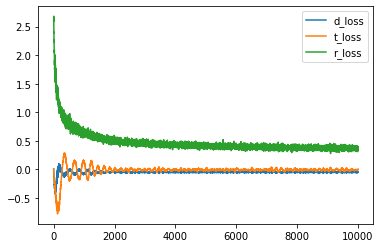

end train


In [7]:
model.train()

# model predict

In [8]:
x_test = final_test_data[x_col]
y_test = final_test_data[y_col]

In [9]:
adda_y_hat = model.predict(x_test)
xgb_200_y_hat = pd.DataFrame(xgb_200.predict(x_test),columns=y_col)
xgb_4765_y_hat = pd.DataFrame(xgb_4765.predict(x_test),columns=y_col)

# evaluate

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def show_metrics(y_pred,y_real):
  res = pd.DataFrame(index=y_pred.columns,columns=['R2','RMSE','MAPE'])
  for i in y_pred.columns:
    res.loc[i,'R2'] = r2_score(y_real[i],y_pred[i])
    res.loc[i,'RMSE'] = np.sqrt(mean_squared_error(y_real[i],y_pred[i]))
    res.loc[i,'MAPE'] = mape(y_real[i],y_pred[i])
  res.loc['AVG'] = res.mean(axis=0)
  return res

In [11]:
adda_res = show_metrics(adda_y_hat,y_test)
adda_res.tail(1)

,R2,RMSE,MAPE
AVG,0.741857,0.857637,inf


In [12]:
xgb_200_res = show_metrics(xgb_200_y_hat,y_test)
xgb_200_res.tail(1)

,R2,RMSE,MAPE
AVG,-2.10365,3.37101,inf


In [13]:
xgb_4765_res = show_metrics(xgb_4765_y_hat,y_test)
xgb_4765_res.tail(1)

,R2,RMSE,MAPE
AVG,-16.9961,4.35956,inf


# convert_predict

In [14]:
x_test['P'] = 100 - x_test['N+A']

In [15]:
def convert_predict(y_pred):
  y_pred[N_col] = normalize(y_pred[N_col])*x_test[['N+A']].values
  y_pred[P_col] = normalize(y_pred[P_col])*x_test[['P']].values
  res = show_metrics(y_pred,y_test)
  return res

In [16]:
convert_predict(adda_y_hat).tail(1)

,R2,RMSE,MAPE
AVG,0.753351,0.839659,inf


In [17]:
convert_predict(xgb_4765_y_hat).tail(1)

,R2,RMSE,MAPE
AVG,-6.36298,3.75655,inf


In [18]:
convert_predict(xgb_200_y_hat).tail(1)

,R2,RMSE,MAPE
AVG,-1.97971,2.95924,inf


In [37]:
table = pd.DataFrame(index=['wadda','xgb4765','xgb200'],columns=['R2','RMSE','MAPE'])
table.loc['wadda'] = convert_predict(adda_y_hat).tail(1).values.ravel()
table.loc['xgb4765'] = convert_predict(xgb_4765_y_hat).tail(1).values.ravel()
table.loc['xgb200'] = convert_predict(xgb_200_y_hat).tail(1).values.ravel()
table

,R2,RMSE,MAPE
wadda,0.753351,0.839659,inf
xgb4765,-6.36298,3.75655,inf
xgb200,-1.97971,2.95924,inf
